In [1]:
#https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/A%20Simple%20Classification.ipynb

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import cm
%matplotlib notebook

In [2]:
fruits = pd.read_table('../../data/datasets/fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
look_up_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
look_up_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [4]:
fruits.shape

(59, 7)

In [5]:
# Split the data into training and testing
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

<IPython.core.display.Javascript object>


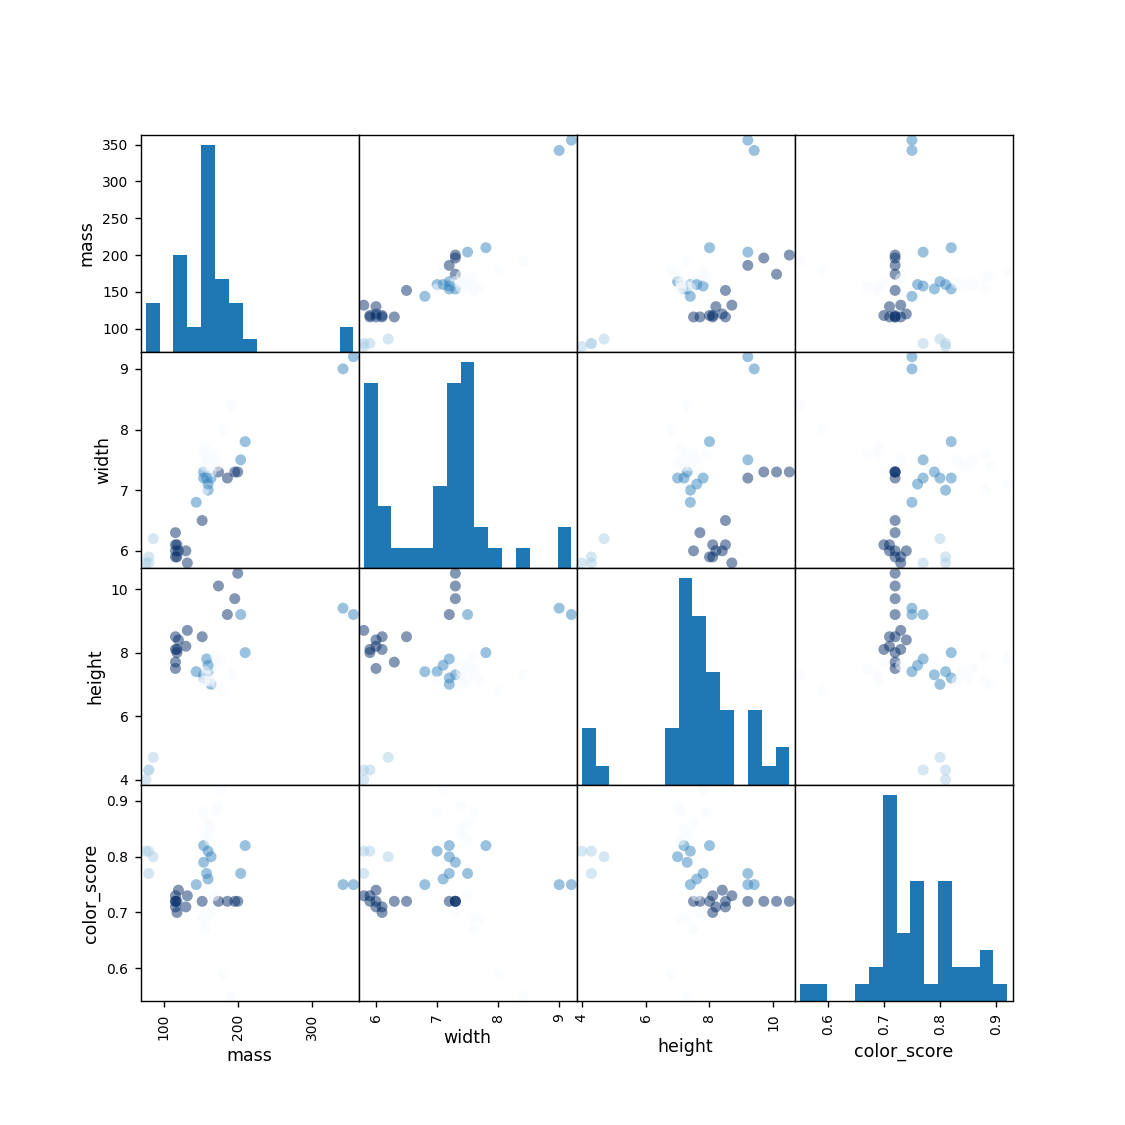

In [6]:
# plotting a scatter matrix
from pandas.plotting import scatter_matrix
cmap = matplotlib.colormaps.get_cmap('Blues')

scatter = scatter_matrix(X_train, c = y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)

<IPython.core.display.Javascript object>


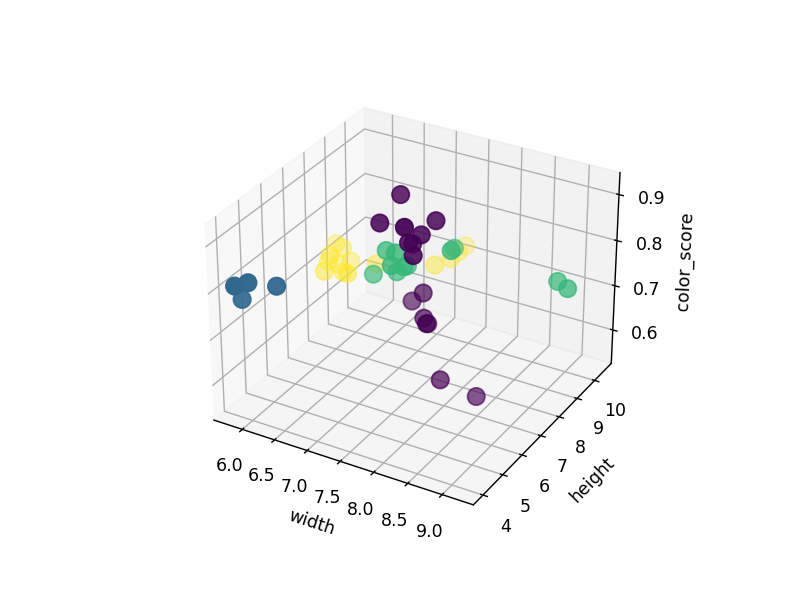

In [7]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [8]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
# Create classifier object
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [10]:
# Train the classifier using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
# Estimate the accuracy of the classifier on future data, using the test data
knn.score(X_test, y_test)

0.5333333333333333

In [12]:
# Use the trained k-NN classifier model to classify new, previously unseen objects
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm

fruit_prediction = knn.predict([ [170, 7.3, 5.5] ])

/home/juanjo/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [13]:
look_up_fruit_name[fruit_prediction[0]]

'apple'

<IPython.core.display.Javascript object>


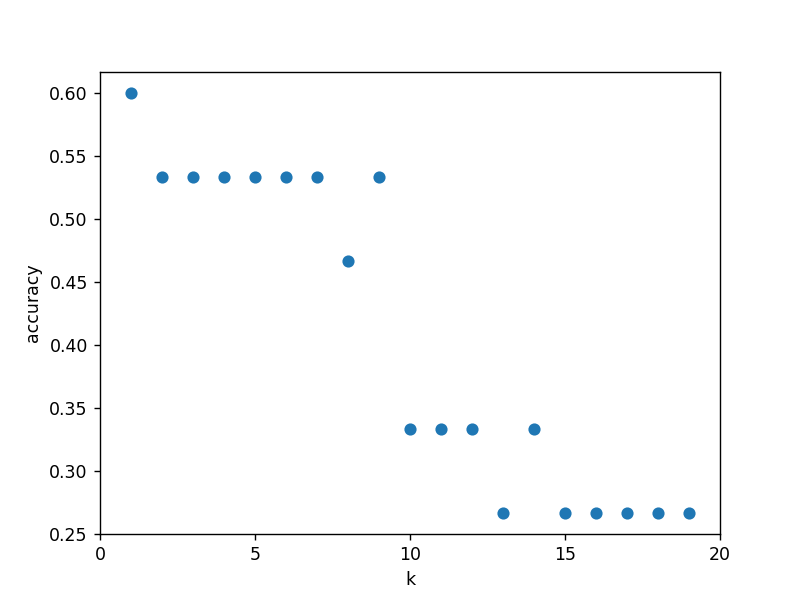

([<matplotlib.axis.XTick at 0x7fe6dc6181c0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

In [14]:
# How sensitive is k-NN classification accuracy to the choice of the 'k' parameter
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])